






<h2 id='part1'>Airbnb Seattle: Data Understanding and Preparation</h2>

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option("display.max_rows", 999)
pd.set_option("display.max_columns", 999)
pd.set_option('precision', 5)


import src.data.rental_calendar as cal
import src.data.listings as lst
import src.data.reviews as rev
import src.data.util as util

# https://www.airdna.co

<h3>Listings dataset</h3>

In [3]:
city = 'seattle'

In [4]:
listings_datafile =f'../data/raw/{city}/listings.csv'
listings = lst.Listings(listings_datafile, city)
listings_df = listings.df

In [5]:
util.stats(listings_df, f'{city} Listings')

seattle Listings dataset has 3818 rows, 92 columns
62 columns has object type
47 columns without any missing value
2 columns missing 75% values


In [6]:
listings_df[:5]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.63629,-122.37103,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.63912,-122.36567,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing w

In [7]:
property_type_vals = listings_df.property_type.value_counts()
property_type_vals

House              1733
Apartment          1708
Townhouse           118
Condominium          91
Loft                 40
Bed & Breakfast      37
Other                22
Cabin                21
Bungalow             13
Camper/RV            13
Boat                  8
Tent                  5
Treehouse             3
Chalet                2
Dorm                  2
Yurt                  1
Name: property_type, dtype: int64

In [8]:
bed_type_vals = listings_df.bed_type.value_counts()
bed_type_vals

Real Bed         3657
Futon              74
Pull-out Sofa      47
Airbed             27
Couch              13
Name: bed_type, dtype: int64

In [9]:
cancellation_policy_vals = listings_df.cancellation_policy.value_counts()
cancellation_policy_vals

strict      1417
moderate    1251
flexible    1150
Name: cancellation_policy, dtype: int64

In [10]:
prices_df = listings.convert_price(listings_df)
prices_df['price'].describe()

count    3818.00000
mean      127.97617
std        90.25002
min        20.00000
25%        75.00000
50%       100.00000
75%       150.00000
max      1000.00000
Name: price, dtype: float64

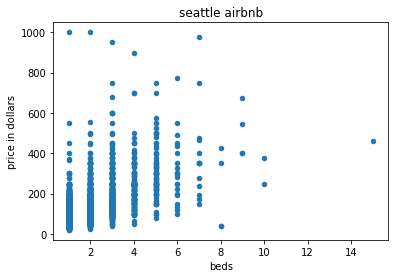

In [11]:
listings.plot_price_with(f'{city} airbnb', prices_df, 'beds')

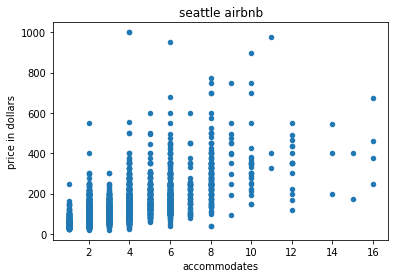

In [12]:
listings.plot_price_with(f'{city} airbnb', prices_df, 'accommodates')

<AxesSubplot:>

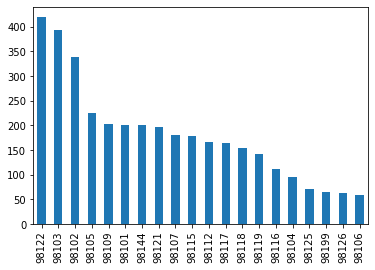

In [13]:
listings_by_zipcode = listings_df['zipcode'].value_counts()
listings_by_zipcode[:20].plot(kind='bar')

In [14]:
rev_cols = listings_df[[c for c in listings_df.columns if 'review' in c]]
rev_cols[:5]

,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,4.07
1,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,1.48
2,20,2014-07-30,2015-09-03,97.0,10.0,10.0,10.0,10.0,10.0,10.0,1.15
3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,38,2012-07-10,2015-10-24,92.0,9.0,9.0,10.0,10.0,9.0,9.0,0.89


<h3>Reviews dataset</h3>

In [15]:
reviews_datafile =f'../data/raw/{city}/reviews.csv'
reviews = rev.Reviews(reviews_datafile, city)
reviews_df = reviews.df

util.stats(reviews_df, f'{city} Reviews')

seattle Reviews dataset has 84849 rows, 6 columns
3 columns has object type
5 columns without any missing value
0 columns missing 75% values


In [16]:
reviews_df[:2]

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...


<h3>Calendar dataset</h3>

In [17]:
cal_datafile =f'../data/raw/{city}/calendar.csv'
calendar = cal.RentalCalendar(cal_datafile, city)
calendar_df = calendar.df

util.stats(calendar_df, f'{city} Calendars')

seattle Calendars dataset has 1393570 rows, 4 columns
3 columns has object type
3 columns without any missing value
0 columns missing 75% values


In [18]:
calendar_df[:2]

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00


<h3>Removing Values</h3>

You can drop values by row or by column, and you can drop based on whether **any** value is missing in a particular row or column or **all** are values in a row or column are missing.

A useful set of many resources in pandas is available [here](https://chrisalbon.com/).  Specifically, Chris takes a close look at missing values [here](https://chrisalbon.com/python/data_wrangling/pandas_dropping_column_and_rows/).

In [19]:
# Drop any row with a missing value.
all_drop  = listings_df.dropna()
all_drop.shape

(0, 92)

In [20]:
#axis 0 specifies you drop, how all specifies that you 
all_row = listings_df.dropna(axis=0, how='all') 
all_row.shape

(3818, 92)

In [21]:
#drop a subset of columns with missing data 
only_summary_drop = util.dropna_any(listings_df, ['summary'])
only_summary_drop.shape

(3641, 92)

In [22]:
# Drop only the rows with missing values in two columns
only_summaryorbedrooms_drop = util.dropna_any(listings_df, ['summary', 'bedrooms'])
only_summaryorbedrooms_drop.shape

(3636, 92)

<h3>Imputation Methods and Resources</h3>

One of the most common methods for working with missing values is by imputing the missing values. Imputation means that you input a value for values that were originally missing. 

It is very common to impute in the following ways:
1. Impute the **mean** of a column.<br><br>

2. If you are working with categorical data or a variable with outliers, then use the **mode** of the column.<br><br>

3. Impute 0, a very small number, or a very large number to differentiate missing values from other values.<br><br>

4. Use knn to impute values based on features that are most similar.<br><br>

In general, be very careful with missing data in understanding the real world implications and reasons for why the missing values exist.  At the same time, these solutions are very quick, and they enable you to get models off the ground.  You can then iterate on your feature engineering to be more careful as time permits.

Chris' content is again very helpful for many of these items - access it [here](https://chrisalbon.com/).  He uses the [sklearn.preprocessing library](http://scikit-learn.org/stable/modules/preprocessing.html).  There are also a ton of ways to fill in missing values directly using pandas, which can be found [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html)


In [23]:
# small amount of rows with beds data missing
dropna_beds = util.dropna_any(listings_df, ['beds'])
dropna_beds.shape

(3817, 92)

In [24]:
# impute missing values of beds with mean
beds_df = util.fill_mean(listings_df, 'beds')
print(f'missing value count: {util.missing_value_count(beds_df, "beds")}')

missing value count: 0


In [25]:
# impute missing values of property_type with mode
property_type_df = listings_df[['property_type']]
print(f'property_type column, missing value count: {util.missing_value_count(property_type_df, "property_type")}')
fill_property_type = util.fill_mode(listings_df, 'property_type', mode_idx=0)
print(f'property_type column after fill mode with index 0, missing value count: {util.missing_value_count(fill_property_type, "property_type")}')

property_type column, missing value count: 1
property_type column after fill mode with index 0, missing value count: 0


In [35]:
price_pred_df = listings.generate_price_pred_dataset()

In [36]:
price_pred_df.columns

Index(['zipcode', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'review_scores_value', 'amenities_count', 'price'],
      dtype='object')

In [37]:
price_pred_df[:5]

,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,review_scores_value,amenities_count,price
0,98119,Apartment,Entire home/apt,4,1.0,1.0,1.0,10.0,10,85.0
1,98119,Apartment,Entire home/apt,4,1.0,1.0,1.0,10.0,16,150.0
2,98119,House,Entire home/apt,11,4.5,5.0,7.0,10.0,21,975.0
3,98119,Apartment,Entire home/apt,3,1.0,0.0,2.0,NaN,14,100.0
4,98119,House,Entire home/apt,6,2.0,3.0,3.0,9.0,13,450.0


In [38]:
util.save(price_pred_df, f'../data/processed/{city}_prices.pkl')

In [30]:
review_scores_df = listings.generate_review_score_dataset()
review_scores_df[:2]

,id,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_value
0,241032,207,95.0,10.0,10.0
1,953595,43,96.0,10.0,10.0


In [31]:
review = review_scores_df[review_scores_df.id ==1178162]
review

,id,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_value


In [32]:
util.save(review_scores_df, f'../data/processed/{city}_review_scores.pkl')

In [33]:
combined_revs = reviews.combined_reviews_and_scores(listings)
util.save(combined_revs, f'../data/processed/{city}_reviews.pkl')